In [19]:
import tensorflow as tf
tf.__version__
%matplotlib inline
import numpy as np

'1.10.0'

In [34]:
mnist = tf.keras.datasets.mnist # 28 x 28 images of hand written digits
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [12]:
%config InlineBackend.figure_format = 'retina'


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

0


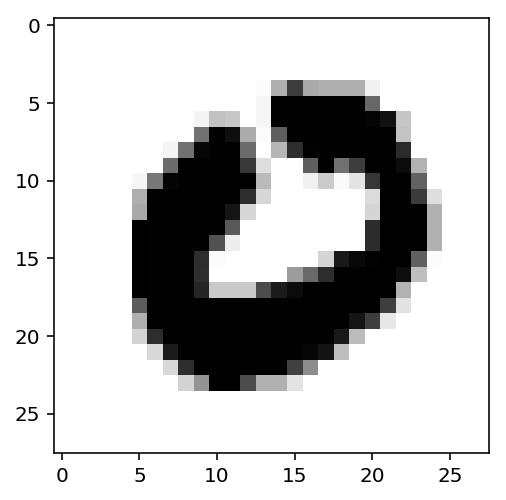

In [22]:
import matplotlib.pyplot as plt

plt.imshow(x_test[25], cmap= plt.cm.binary)
print(y_test[25])

In [35]:
np.bincount(y_train)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64)

In [37]:
x_train.shape, x_test.shape, 

((60000, 28, 28), (10000, 28, 28))

In [36]:
#scale or normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

0


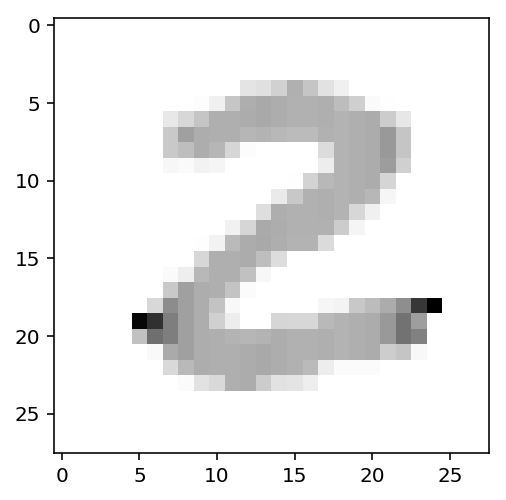

In [31]:
plt.imshow(x_test[25], cmap= plt.cm.binary)
print(y_test[25])

In [44]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 3s 58us/step - loss: 0.2673 - acc: 0.9228
Epoch 2/3
60000/60000 [==============================] - 3s 52us/step - loss: 0.1090 - acc: 0.9665
Epoch 3/3
60000/60000 [==============================] - 3s 52us/step - loss: 0.0713 - acc: 0.9776


In [45]:
val_loss, val_acc = model.evaluate(x_test, y_test)
val_loss, val_acc

10000/10000 [==============================] - 0s 31us/step


(0.09673534489050507, 0.9704)

In [46]:
model.save('epic_num_reader')

In [48]:
new_model = tf.keras.models.load_model('epic_num_reader')

In [49]:
predictions = new_model.predict([x_test])
predictions

array([[5.88992854e-10, 7.92306807e-08, 9.87746353e-06, ...,
        9.99981284e-01, 1.36593634e-08, 4.82813896e-08],
       [6.61361466e-10, 1.71956417e-05, 9.99979138e-01, ...,
        3.81283316e-09, 2.17995222e-07, 5.07615174e-12],
       [2.32656188e-08, 9.99718726e-01, 5.32503327e-05, ...,
        3.33953249e-05, 1.31506313e-04, 3.32481306e-07],
       ...,
       [1.05896425e-09, 1.08496795e-06, 1.77338162e-08, ...,
        1.09485864e-05, 2.31357444e-06, 1.80828613e-06],
       [5.06460708e-07, 3.58708263e-07, 5.87664672e-08, ...,
        1.26439064e-08, 1.42511035e-05, 6.42270057e-11],
       [3.95145207e-06, 5.18376986e-09, 8.47590172e-07, ...,
        3.83222704e-10, 2.27370165e-07, 2.45784939e-08]], dtype=float32)

In [57]:
np.argmax([predictions[0]])

numpy.int64

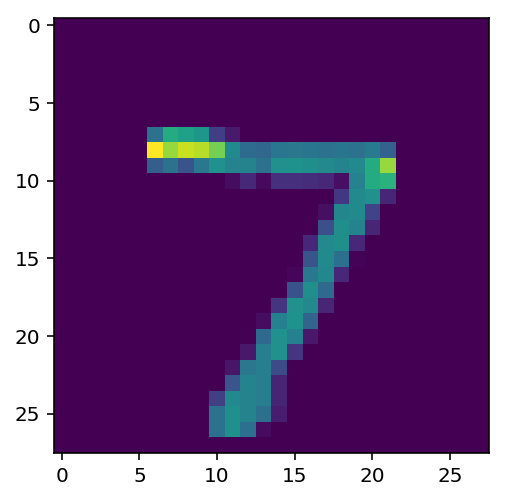

In [51]:
plt.imshow(x_test[0])

In [60]:
for a in range(0,predictions.shape[0]):
    if np.argmax([predictions[a]]) != y_test[a]:
        print(a)

18
151
241
247
290
320
321
340
381
445
448
543
582
583
619
691
720
740
813
882
900
924
947
956
1003
1014
1039
1112
1156
1178
1181
1182
1192
1226
1228
1232
1247
1272
1299
1319
1326
1393
1466
1494
1500
1522
1530
1549
1553
1569
1570
1609
1621
1681
1709
1737
1790
1800
1850
1878
1901
1952
1955
1970
1984
1987
2004
2018
2043
2073
2093
2109
2118
2135
2138
2162
2174
2182
2186
2189
2224
2272
2293
2298
2325
2329
2387
2406
2414
2488
2526
2582
2607
2617
2648
2654
2720
2743
2760
2771
2780
2810
2863
2915
2921
2927
2939
2970
3060
3073
3100
3109
3117
3240
3251
3260
3422
3457
3503
3520
3533
3558
3559
3565
3567
3574
3597
3601
3604
3681
3702
3716
3751
3778
3780
3798
3808
3811
3817
3818
3821
3838
3850
3853
3869
3871
3893
3906
3926
3941
3968
3976
3985
3988
4000
4065
4075
4078
4093
4100
4154
4176
4224
4248
4271
4284
4289
4294
4306
4355
4360
4369
4405
4425
4437
4497
4500
4504
4505
4536
4547
4548
4601
4615
4619
4635
4662
4731
4761
4807
4814
4823
4879
4880
4886
4910
4950
4956
4978
4997
5140
5176
5331
5457
5634


3

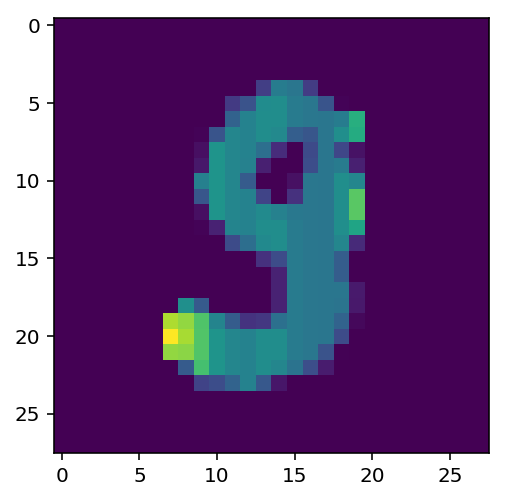

In [66]:
plt.imshow(x_test[1553])
np.argmax([predictions[1553]])

In [68]:
fmnist= tf.keras.datasets.fashion_mnist

In [69]:
(x_train,y_train),(x_test,y_test) = fmnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [70]:
x_train.shape

(60000, 28, 28)

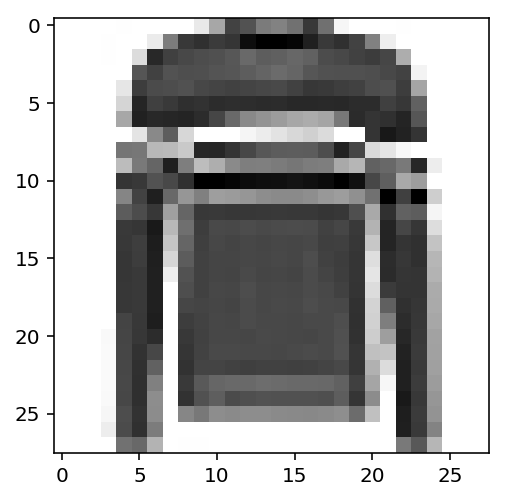

In [73]:
plt.imshow(x_train[5], cmap = plt.cm.binary)

In [75]:
y_train[5]

2

In [80]:
from collections import Counter
Counter(np.bincount(y_train))
np.bincount(y_train)

Counter({6000: 10})

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

In [81]:
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)

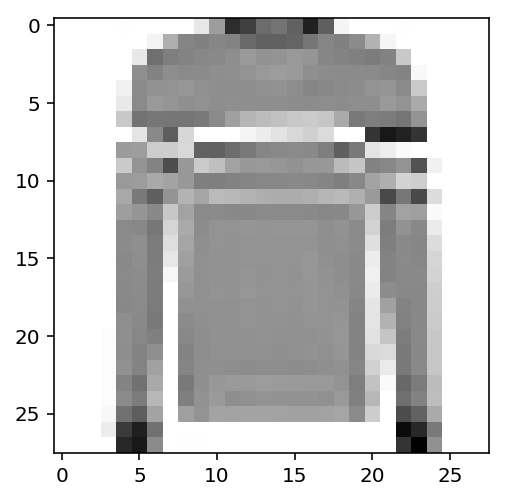

In [82]:
plt.imshow(x_train[5], cmap = plt.cm.binary)

In [83]:
x_train[5]

array([[0.        , 0.        , 0.        , 0.        , 0.00231733,
        0.        , 0.        , 0.        , 0.        , 0.05098127,
        0.2039251 , 0.43565816, 0.39858087, 0.30588765, 0.28966633,
        0.32674362, 0.4611488 , 0.33137828, 0.02085598, 0.        ,
        0.        , 0.        , 0.00231733, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00127831, 0.        ,
        0.        , 0.02556611, 0.16745799, 0.25438275, 0.26333089,
        0.25054783, 0.25821766, 0.30934987, 0.32596784, 0.32596784,
        0.31957632, 0.28378377, 0.25182614, 0.26333089, 0.24032139,
        0.16106646, 0.02173119, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.0014005 , 0.        ,
        0.04901735, 0.29970607, 0.26749467, 0.25629071, 0.24928823,
        0.24508674, 0.23528327, 0.21007435, 0.2268803 , 0.22267881,
        0.21287534, 0.2212

In [87]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model1.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
model1.fit(x_train,y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.4748 - acc: 0.8283
Epoch 2/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.3512 - acc: 0.8703
Epoch 3/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.3187 - acc: 0.8814
Epoch 4/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2965 - acc: 0.8888
Epoch 5/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2784 - acc: 0.8953
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2665 - acc: 0.8987
Epoch 7/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2505 - acc: 0.9044
Epoch 8/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2414 - acc: 0.9075
Epoch 9/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.2319 - acc: 0.9113
Epoch 10/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2216 - acc: 0.9144

In [88]:
val_loss, val_acc = model1.evaluate(x_test,y_test)
val_loss, val_acc

10000/10000 [==============================] - 0s 34us/step


(0.34208730911016466, 0.8818)